/usr/local/lib/python3.11/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but RBFSampler was fitted with feature names
  warnings.warn(


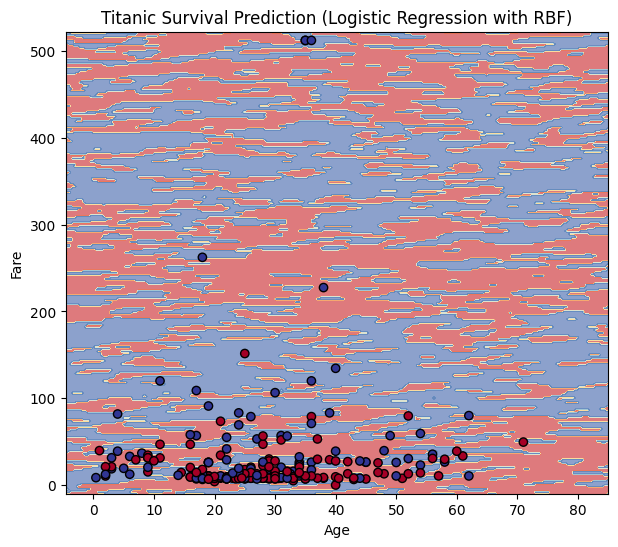

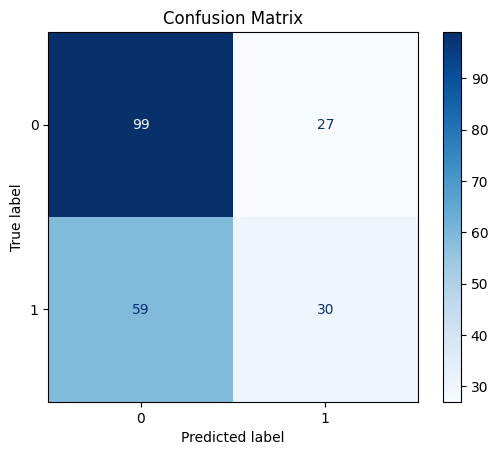

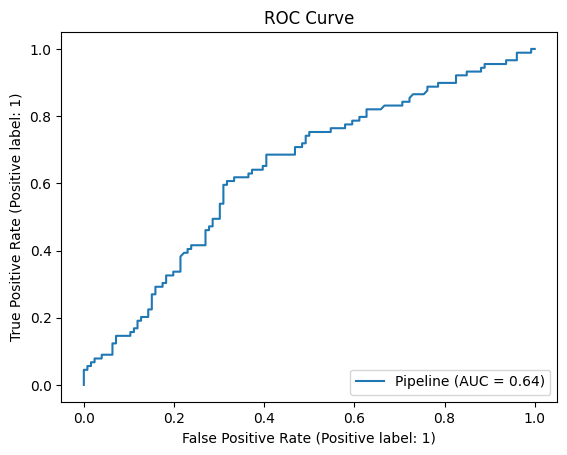

Model Accuracy: 0.6


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.kernel_approximation import RBFSampler
from sklearn.pipeline import Pipeline
from sklearn.metrics import ConfusionMatrixDisplay, RocCurveDisplay, accuracy_score

# ------------------------------
# 1. Load Titanic dataset
# ------------------------------
titanic = sns.load_dataset("titanic").dropna(subset=["age", "sex", "fare", "class", "survived"])

# Select two numeric features for visualization (age & fare)
X = titanic[["age", "fare"]]
y = titanic["survived"]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# ------------------------------
# 2. Logistic Regression with RBF features
# ------------------------------
rbf_logreg = Pipeline([
    ("rbf", RBFSampler(gamma=0.1, n_components=100, random_state=42)), 
    ("logreg", LogisticRegression(max_iter=10000))
])

rbf_logreg.fit(X_train, y_train)
y_pred = rbf_logreg.predict(X_test)

# ------------------------------
# 3. Decision Boundary Visualization
# ------------------------------
x_min, x_max = X["age"].min() - 5, X["age"].max() + 5
y_min, y_max = X["fare"].min() - 10, X["fare"].max() + 10
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300),
                     np.linspace(y_min, y_max, 300))

Z = rbf_logreg.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

plt.figure(figsize=(7,6))
plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu, alpha=0.6)
plt.scatter(X_test["age"], X_test["fare"], c=y_test, cmap=plt.cm.RdYlBu, edgecolors="k")
plt.title("Titanic Survival Prediction (Logistic Regression with RBF)")
plt.xlabel("Age")
plt.ylabel("Fare")
plt.show()

# ------------------------------
# 4. Confusion Matrix
# ------------------------------
ConfusionMatrixDisplay.from_predictions(y_test, y_pred, cmap="Blues")
plt.title("Confusion Matrix")
plt.show()

# ------------------------------
# 5. ROC Curve
# ------------------------------
RocCurveDisplay.from_estimator(rbf_logreg, X_test, y_test)
plt.title("ROC Curve")
plt.show()

# ------------------------------
# 6. Accuracy Score
# ------------------------------
print("Model Accuracy:", accuracy_score(y_test, y_pred))
